# Import Faces Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile


zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Face Images/archive.zip", 'r')
zip_ref.extractall("drive/MyDrive/face_images")
zip_ref.close()

# **Prepare Faces Images**

In [ ]:
#@title  Reshape Faces Dataset
from PIL import Image
import numpy as np
from numpy.linalg import eigh

dataMatrix = np.zeros(10304)
for i in range(1,41):
  for j in range(1,11):
    img = Image.open(f'drive/MyDrive/face_images/s{i}/{j}.pgm')
    data = np.asarray(img)
    vectoredData = np.reshape(data, 10304)
    dataMatrix = np.row_stack((dataMatrix,vectoredData))
faces=dataMatrix[1:]





In [ ]:
#@title Generate Y Vector
labels = np.ones((400,1))
adder = -1
for i in range(400):
  if i%10 == 0:
    adder =adder+1
  labels[i]=labels[i]+adder


In [ ]:
#@title Split data 50-50
x_test=faces[1::2,:]  
x_train=faces[::2,:]   
y_test = labels[1::2,:] 
y_train=labels[::2,:] 


# **PCA Functions**

In [ ]:
#@title Get Project Matrix For every Alpha
def PCA(x_train):
  mean_vector_trained=np.mean(x_train,axis=0)
  centralized_training=x_train-mean_vector_trained
  covariance=np.cov(centralized_training,rowvar=False,bias=True)

  #Find Eigen Values and Vectors
  vals,vecs=eigh(covariance)

  #Sort Eigen Values and Vectors
  sorted_index = np.argsort(vals)[::-1]
  sorted_eigenvalue = vals[sorted_index]
  sorted_eigenvectors = vecs[:,sorted_index]

  return sorted_eigenvalue,sorted_eigenvectors




In [ ]:
#@title Loop over alphas to find no of components for each alhpa

def PCA_Test(alphas,sorted_eigenvalue):
  no_components=[]
  for alpha in alphas:
    sum=0
    for i in range(0,len(sorted_eigenvalue)):
      sum=sum+sorted_eigenvalue[i]
      if sum/np.sum(sorted_eigenvalue)>=alpha:
        no_components.append(i+1)
        break
  return no_components



In [ ]:
#@title Transform Trained Data
def PCA_Transformation(sorted_eigenvectors,no_components,x_train,x_test):
  #Select N Eigen Vector for each subset
  eigenvector_subset1=sorted_eigenvectors[:,0:no_components[0]]
  eigenvector_subset2=sorted_eigenvectors[:,0:no_components[1]]
  eigenvector_subset3=sorted_eigenvectors[:,0:no_components[2]]
  eigenvector_subset4=sorted_eigenvectors[:,0:no_components[3]]


  #Transform Data for each alpha
  mean_vector_trained=np.mean(x_train,axis=0)
  centralized_training=x_train-mean_vector_trained
  x_train_reduced1 = np.dot(eigenvector_subset1.transpose(),centralized_training.transpose()).transpose()
  x_train_reduced2= np.dot(eigenvector_subset2.transpose(),centralized_training.transpose()).transpose()
  x_train_reduced3 = np.dot(eigenvector_subset3.transpose(),centralized_training.transpose()).transpose()
  x_train_reduced4 = np.dot(eigenvector_subset4.transpose(),centralized_training.transpose()).transpose()

  #Transform test Data for each alpha
  mean_vector_test=np.mean(x_test,axis=0)
  centralized_testing=x_test-mean_vector_test
  x_test_reduced1 = np.dot(eigenvector_subset1.transpose(),centralized_testing.transpose()).transpose()
  x_test_reduced2 = np.dot(eigenvector_subset2.transpose(),centralized_testing.transpose()).transpose()
  x_test_reduced3 = np.dot(eigenvector_subset3.transpose(),centralized_testing.transpose()).transpose()
  x_test_reduced4 = np.dot(eigenvector_subset4.transpose(),centralized_testing.transpose()).transpose()

  return x_train_reduced1,x_train_reduced2,x_train_reduced3,x_train_reduced4,x_test_reduced1,x_test_reduced2,x_test_reduced3,x_test_reduced4


# **Testing PCA On Faces Dataset**

In [ ]:
alphas=[0.8,0.85,0.9,0.95]
sorted_eigenvalue,sorted_eigenvectors=PCA(x_train)
no_components=PCA_Test(alphas,sorted_eigenvalue)
x_train_reduced1,x_train_reduced2,x_train_reduced3,x_train_reduced4,x_test_reduced1,x_test_reduced2,x_test_reduced3,x_test_reduced4=PCA_Transformation(sorted_eigenvectors,no_components,x_train,x_test)

 Neigbhours are :  1
Model Accuracy for alpha 0.8 = 95.0 %
Model Accuracy for alpha 0.85 = 95.0 %
Model Accuracy for alpha 0.9 = 93.5 %
Model Accuracy for alpha 0.95 = 94.0 %


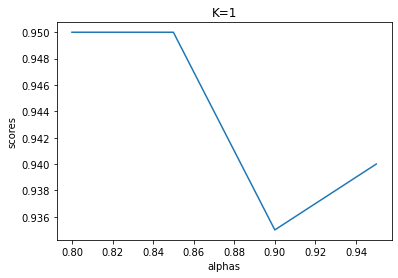

 Neigbhours are :  3
Model Accuracy for alpha 0.8 = 89.5 %
Model Accuracy for alpha 0.85 = 89.5 %
Model Accuracy for alpha 0.9 = 89.5 %
Model Accuracy for alpha 0.95 = 89.5 %


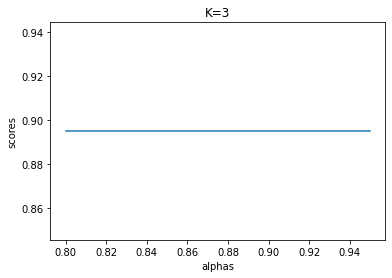

 Neigbhours are :  5
Model Accuracy for alpha 0.8 = 84.0 %
Model Accuracy for alpha 0.85 = 84.5 %
Model Accuracy for alpha 0.9 = 84.5 %
Model Accuracy for alpha 0.95 = 84.0 %


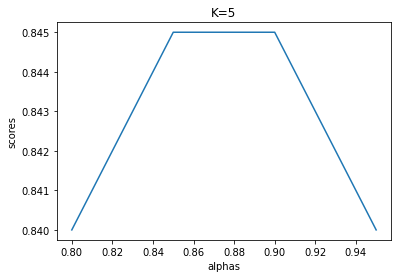

 Neigbhours are :  7
Model Accuracy for alpha 0.8 = 80.0 %
Model Accuracy for alpha 0.85 = 78.0 %
Model Accuracy for alpha 0.9 = 75.5 %
Model Accuracy for alpha 0.95 = 74.0 %


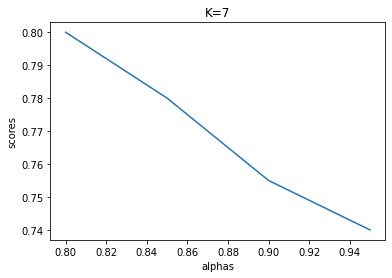

In [ ]:
#@title Model Creation and Testing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

K_Neigbhours=[1,3,5,7]
for i in K_Neigbhours:
  knn = KNeighborsClassifier(n_neighbors=i)

  print(" Neigbhours are : ",i)
  knn.fit(x_train_reduced1,np.ravel(y_train))
  y_pred = knn.predict(x_test_reduced1)
  accuracy1  = metrics.accuracy_score(y_test,y_pred)
  print(f'Model Accuracy for alpha 0.8 = {100*accuracy1:0.3} %' )


  knn.fit(x_train_reduced2,np.ravel(y_train))
  y_pred = knn.predict(x_test_reduced2)
  accuracy2  = metrics.accuracy_score(y_test,y_pred)
  print(f'Model Accuracy for alpha 0.85 = {100*accuracy2:0.3} %' )

  knn.fit(x_train_reduced3,np.ravel(y_train))
  y_pred = knn.predict(x_test_reduced3)
  accuracy3  = metrics.accuracy_score(y_test,y_pred)
  print(f'Model Accuracy for alpha 0.9 = {100*accuracy3:0.3} %' )

  knn.fit(x_train_reduced4,np.ravel(y_train))
  y_pred = knn.predict(x_test_reduced4)
  accuracy4  = metrics.accuracy_score(y_test,y_pred)
  print(f'Model Accuracy for alpha 0.95 = {100*accuracy4:0.3} %' )


  alphas=[0.8,0.85,0.9,0.95]
  scores=[accuracy1, accuracy2, accuracy3, accuracy4]
  plt.plot(alphas, scores)
  plt.xlabel('alphas')
  plt.ylabel('scores')  
  plt.title("K="+str(i))
  plt.show()


# **LDA Function**

In [ ]:
#@title Get Mean Vector for every class
import pandas as pd

def LDA(x_train,y_train):
  # Stick X and Y then Change to Dataframe
  faces=np.column_stack([x_train, y_train])
  faces = pd.DataFrame(faces)
  #Get average of every feature for every class using group by 
  mean_vector=faces.groupby([10304]).mean()
  #Change Data back to numpy
  mean_vector = mean_vector.to_numpy()
  #Get Center Class Matrices
  center_class_matrix = np.zeros((len(x_train),10304))

  subset=-1
  for i in range(0,len(x_train)):
    if i%5==0:
      subset=subset+1
    center_class_matrix[i]=x_train[i]-mean_vector[subset]


  #Get Within Class Matrix "S"
  within_class_matrix=np.zeros((10304,10304))
  #Get Within class matrix S for every class "For example class 1 is 5 instances so get S1" then sum S for every class to get Within class matrix
  for i in range(0,5,40):
    within_class_matrix=within_class_matrix+np.dot(center_class_matrix[i:i+5,:].T,center_class_matrix[i:i+5,:])


  #@title Calculate Between Class Matrix "Sb"
  Between_class_matrix=np.zeros((10304,10304)) 

  for i in range(40):
    mean_all_vector=np.mean(x_train,axis=0)
    Between_class_matrix+=5*np.outer(mean_vector[i]-mean_all_vector, (mean_vector[i]-mean_all_vector).T)


  #@title Get Eigen Values and Vectors
  A = np.dot(np.linalg.inv(within_class_matrix),Between_class_matrix)
  eigen_values, eigen_vectors = np.linalg.eigh(A) 
  # eigen_vectors = eigen_vectors.T
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  return sorted_eigenvalue,sorted_eigenvectors

In [ ]:
#@title Transform Train and Test data over projection matrix
def LDA_Transformation(k,sorted_eigenvectors,x_train,x_test):
  eigenvector_subset=sorted_eigenvectors[:,:k-1]
  #Transform Train Data
  mean_vector_trained=np.mean(x_train,axis=0)
  centralized_training=x_train-mean_vector_trained
  x_train_reduced = np.dot(eigenvector_subset.transpose(),centralized_training.transpose()).transpose()
  #Transform Test Data
  mean_vector_trained=np.mean(x_test,axis=0)
  centralized_training=x_test-mean_vector_trained
  x_test_reduced = np.dot(eigenvector_subset.transpose(),centralized_training.transpose()).transpose()
  
  return x_train_reduced,x_test_reduced


# **Testing LDA On Faces Dataset**

In [ ]:
#@title Training and Testing KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

sorted_eigenvalue,sorted_eigenvectors=LDA(x_train,y_train)
x_train_reduced,x_test_reduced=LDA_Transformation(39,sorted_eigenvectors,x_train,x_test)






 Neigbhours are :  1
Model Accuracy = 93.5 %
 Neigbhours are :  3
Model Accuracy = 85.5 %
 Neigbhours are :  5
Model Accuracy = 81.5 %
 Neigbhours are :  7
Model Accuracy = 72.5 %


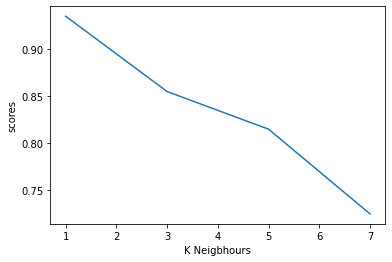

In [ ]:
K_Neigbhours=[1,3,5,7]
scores=[]
for i in K_Neigbhours:
  knn = KNeighborsClassifier(n_neighbors=i)
  print(" Neigbhours are : ",i)
  knn.fit(x_train_reduced,np.ravel(y_train))
  y_pred = knn.predict(x_test_reduced)
  accuracy  = metrics.accuracy_score(y_test,y_pred)
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  scores.append(accuracy)
plt.plot(K_Neigbhours, scores)
plt.xlabel('K Neigbhours')
plt.ylabel('scores')  
plt.show()

# **Non Faces Preparation**

In [ ]:
#@title  Import Cars Dataset
dataMatrix = np.zeros(10304)
for i in range(1,801):
   cars=Image.open(f'/content/drive/MyDrive/Non_Faces_Images/{i}.jpg')
   cars=cars.resize((92,112)).convert('L')
   data = np.asarray(cars).T
   vectoredData = np.reshape(data, 10304)
   dataMatrix = np.row_stack((dataMatrix,vectoredData))
non_faces=dataMatrix[1:]


non_faces.shape

(800, 10304)

In [ ]:
#@title Get Different Number of Non faces to train with
non_faces_400=non_faces[0:400]
non_faces_500=non_faces[0:500]
non_faces_600=non_faces[0:600]


In [ ]:
#@title Binary Classification for faces and non faces

#Train Data

classes400 = np.ones((400,1))
for i in range(0,200):
  classes400[i]=0

classes500 = np.ones((450,1))
for i in range(0,200):
  classes500[i]=0


classes600 = np.ones((500,1))
for i in range(0,200):
  classes600[i]=0



In [ ]:
#@title Preparing Data for train and test from both classes
non_faces_train400=non_faces_400[1::2, :]  
non_faces_test400=non_faces_400[::2,:]
train_data1=np.concatenate((x_train,non_faces_train400), axis=0)
test_data1=np.concatenate((x_test,non_faces_test400), axis=0)


non_faces_train500=non_faces_500[1::2, :]  
non_faces_test500=non_faces_500[::2,:]
train_data2=np.concatenate((x_train,non_faces_train500), axis=0)
test_data2=np.concatenate((x_test,non_faces_test500), axis=0)

non_faces_train600=non_faces_600[1::2, :]  
non_faces_test600=non_faces_600[::2,:]
train_data3=np.concatenate((x_train,non_faces_train600), axis=0)
test_data3=np.concatenate((x_test,non_faces_test600), axis=0)





In [ ]:
non_faces_800=non_faces[0:800]

classes800 = np.ones((600,1))
for i in range(0,200):
  classes800[i]=0


non_faces_train800=non_faces_800[1::2, :]  
non_faces_test800=non_faces_800[::2,:]
train_data4=np.concatenate((x_train,non_faces_train800), axis=0)
test_data4=np.concatenate((x_test,non_faces_test800), axis=0)




# **Testing PCA On Both Faces and Non Faces**

In [ ]:
alphas=[0.8,0.85,0.9,0.95]
sorted_eigenvalue,sorted_eigenvectors=PCA(train_data)
no_components=PCA_Test(alphas,sorted_eigenvalue)
x_train_reduced1,x_train_reduced2,x_train_reduced3,x_train_reduced4,x_test_reduced1,x_test_reduced2,x_test_reduced3,x_test_reduced4=PCA_Transformation(sorted_eigenvectors,no_components,train_data,test_data)

In [ ]:
#@title Model Creation and Testing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

K_Neigbhours=[1,3,5,7]
for i in K_Neigbhours:
  knn = KNeighborsClassifier(n_neighbors=i)

  print(" Neigbhours are : ",i)
  knn.fit(x_train_reduced1,np.ravel(classes))
  y_pred = knn.predict(x_test_reduced1)
  accuracy  = metrics.accuracy_score(classes,y_pred)
  print(f'Model Accuracy for alpha 0.8 = {100*accuracy:0.3} %' )


  knn.fit(x_train_reduced2,np.ravel(classes))
  y_pred = knn.predict(x_test_reduced2)
  accuracy  = metrics.accuracy_score(classes,y_pred)
  print(f'Model Accuracy for alpha 0.85 = {100*accuracy:0.3} %' )

  knn.fit(x_train_reduced3,np.ravel(classes))
  y_pred = knn.predict(x_test_reduced3)
  accuracy  = metrics.accuracy_score(classes,y_pred)
  print(f'Model Accuracy for alpha 0.9 = {100*accuracy:0.3} %' )

  knn.fit(x_train_reduced4,np.ravel(classes))
  y_pred = knn.predict(x_test_reduced4)
  accuracy  = metrics.accuracy_score(classes,y_pred)
  print(f'Model Accuracy for alpha 0.95 = {100*accuracy:0.3} %' )




 Neigbhours are :  1
Model Accuracy for alpha 0.8 = 99.0 %
Model Accuracy for alpha 0.85 = 99.0 %
Model Accuracy for alpha 0.9 = 97.8 %
Model Accuracy for alpha 0.95 = 96.8 %
 Neigbhours are :  3
Model Accuracy for alpha 0.8 = 98.5 %
Model Accuracy for alpha 0.85 = 98.2 %
Model Accuracy for alpha 0.9 = 97.2 %
Model Accuracy for alpha 0.95 = 94.8 %
 Neigbhours are :  5
Model Accuracy for alpha 0.8 = 98.2 %
Model Accuracy for alpha 0.85 = 97.8 %
Model Accuracy for alpha 0.9 = 96.2 %
Model Accuracy for alpha 0.95 = 93.2 %
 Neigbhours are :  7
Model Accuracy for alpha 0.8 = 97.8 %
Model Accuracy for alpha 0.85 = 97.0 %
Model Accuracy for alpha 0.9 = 95.5 %
Model Accuracy for alpha 0.95 = 91.8 %


# **Testing LDA on Faces with Non faces**

In [ ]:
#@title LDA Function for both Faces and Non Faces Data

#@title Get Mean Vector for every class
import pandas as pd

def LDA(x_train,y_train):
  # Stick X and Y then Change to Dataframe
  faces=np.column_stack([x_train, y_train])
  faces = pd.DataFrame(faces)
  #Get average of every feature for every class using group by 
  mean_vector=faces.groupby([10304]).mean()
  #Change Data back to numpy
  mean_vector = mean_vector.to_numpy()
  print("mean vector",mean_vector)
  #Get Center Class Matrices
  center_class_matrix = np.zeros((len(x_train),10304))


  for i in range(0,len(x_train)):
    if i>199:
      center_class_matrix[i]=x_train[i]-mean_vector[1]
    else:
      center_class_matrix[i]=x_train[i]-mean_vector[0]



  print("center_class vector",center_class_matrix.shape)

  #Get Within Class Matrix "S"
  within_class_matrix=np.zeros((10304,10304))
  #Get Within class matrix S for every class "For example class 1 is 200 instances so get S1" then sum S for every class to get Within class matrix
  S1=np.dot(center_class_matrix[0:200,:].T,center_class_matrix[0:200,:])
  S2=np.dot(center_class_matrix[200:400,:].T,center_class_matrix[200:400,:])
  within_class_matrix=S1+S2

  print("within class",within_class_matrix.shape)


  #@title Calculate Between Class Matrix "Sb"
  Between_class_matrix=np.zeros((10304,10304)) 
  mean_all_vector=np.mean(x_train,axis=0)
  Between_class_matrix+=np.outer(mean_vector[0]-mean_vector[1], (mean_vector[0]-mean_vector[1]).T)
  print("between",Between_class_matrix.shape)
  #@title Get Eigen Values and Vectors
  A = np.dot(np.linalg.inv(within_class_matrix),Between_class_matrix)
  eigen_values, eigen_vectors = np.linalg.eigh(A) 
  # eigen_vectors = eigen_vectors.T
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  return sorted_eigenvalue,sorted_eigenvectors

In [ ]:
#@title Get Eigen Values and Vectors for each Sampling 
sorted_eigenvalue1,sorted_eigenvectors1=LDA(train_data1,classes400)
sorted_eigenvalue2,sorted_eigenvectors2=LDA(train_data2,classes500)
sorted_eigenvalue3,sorted_eigenvectors3=LDA(train_data3,classes600)
sorted_eigenvalue4,sorted_eigenvectors4=LDA(train_data4,classes800)





mean vector [[ 86.115  86.265  86.685 ...  76.5    77.395  77.085]
 [142.33  142.39  141.695 ... 124.045 123.73  121.66 ]]
center_class vector (400, 10304)
within class (10304, 10304)
between (10304, 10304)
mean vector [[ 86.115  86.265  86.685 ...  76.5    77.395  77.085]
 [143.576 144.152 143.188 ... 126.584 125.7   123.512]]
center_class vector (450, 10304)
within class (10304, 10304)
between (10304, 10304)
mean vector [[ 86.115       86.265       86.685      ...  76.5         77.395
   77.085     ]
 [142.79666667 143.09333333 142.21       ... 123.08       122.40666667
  120.61      ]]
center_class vector (500, 10304)
within class (10304, 10304)
between (10304, 10304)
mean vector [[ 86.115   86.265   86.685  ...  76.5     77.395   77.085 ]
 [144.885  145.58   144.9275 ... 124.11   123.1875 122.0275]]
center_class vector (600, 10304)
within class (10304, 10304)
between (10304, 10304)


In [ ]:
#@title Non faces lda_transformation
#@title Transform Train and Test data over projection matrix
def LDA_Transformation_non(sorted_eigenvectors,x_train,x_test):
  eigenvector_subset=sorted_eigenvectors[:,0]
  #Transform Train Data
  mean_vector_trained=np.mean(x_train,axis=0)
  centralized_training=x_train-mean_vector_trained
  x_train_reduced = np.dot(eigenvector_subset.transpose(),centralized_training.transpose()).transpose()
  #Transform Test Data
  mean_vector_trained=np.mean(x_test,axis=0)
  centralized_training=x_test-mean_vector_trained
  x_test_reduced = np.dot(eigenvector_subset.transpose(),centralized_training.transpose()).transpose()
  
  return x_train_reduced,x_test_reduced


 Neigbhours are :  1
Model Accuracy = 95.0 %
 Neigbhours are :  3
Model Accuracy = 94.5 %
 Neigbhours are :  5
Model Accuracy = 96.0 %
 Neigbhours are :  7
Model Accuracy = 96.0 %
 Neigbhours are :  9
Model Accuracy = 95.8 %


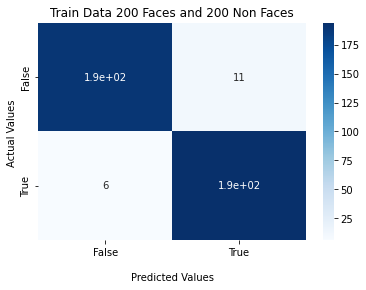

 Neigbhours are :  1
Model Accuracy = 70.9 %
 Neigbhours are :  3
Model Accuracy = 74.9 %
 Neigbhours are :  5
Model Accuracy = 76.4 %
 Neigbhours are :  7
Model Accuracy = 75.8 %
 Neigbhours are :  9
Model Accuracy = 77.1 %


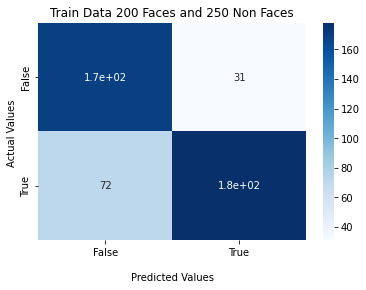

 Neigbhours are :  1
Model Accuracy = 94.2 %
 Neigbhours are :  3
Model Accuracy = 94.6 %
 Neigbhours are :  5
Model Accuracy = 94.8 %
 Neigbhours are :  7
Model Accuracy = 96.0 %
 Neigbhours are :  9
Model Accuracy = 96.2 %


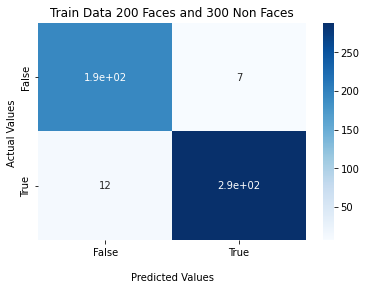

 Neigbhours are :  1
Model Accuracy = 96.2 %
 Neigbhours are :  3
Model Accuracy = 96.3 %
 Neigbhours are :  5
Model Accuracy = 96.3 %
 Neigbhours are :  7
Model Accuracy = 96.5 %
 Neigbhours are :  9
Model Accuracy = 96.7 %


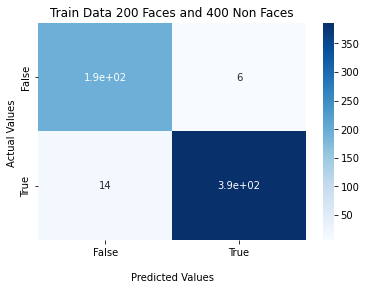

In [ ]:
#@title Training and Testing KNN Model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
K_Neigbhours=[1,3,5,7,9]

x_train_reduced1,x_test_reduced1=LDA_Transformation_non(sorted_eigenvectors1,train_data1,test_data1)
for i in K_Neigbhours:
  knn = KNeighborsClassifier(n_neighbors=i)
  print(" Neigbhours are : ",i)
  knn.fit(x_train_reduced1.reshape(-1, 1),np.ravel(classes400))
  y_pred = knn.predict(x_test_reduced1.reshape(-1, 1))
  accuracy  = metrics.accuracy_score(classes400,y_pred)
  print(f'Model Accuracy = {100*accuracy:0.3} %' )

cf_matrix = confusion_matrix(classes400,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Train Data 200 Faces and 200 Non Faces');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()




x_train_reduced2,x_test_reduced2=LDA_Transformation_non(sorted_eigenvectors2,train_data2,test_data2)
for i in K_Neigbhours:
  knn = KNeighborsClassifier(n_neighbors=i)
  print(" Neigbhours are : ",i)
  knn.fit(x_train_reduced2.reshape(-1, 1),np.ravel(classes500))
  y_pred = knn.predict(x_test_reduced2.reshape(-1, 1))
  accuracy  = metrics.accuracy_score(classes500,y_pred)
  print(f'Model Accuracy = {100*accuracy:0.3} %' )


cf_matrix = confusion_matrix(classes500,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Train Data 200 Faces and 250 Non Faces');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()



x_train_reduced3,x_test_reduced3=LDA_Transformation_non(sorted_eigenvectors3,train_data3,test_data3)
for i in K_Neigbhours:
  knn = KNeighborsClassifier(n_neighbors=i)
  print(" Neigbhours are : ",i)
  knn.fit(x_train_reduced3.reshape(-1, 1),np.ravel(classes600))
  y_pred = knn.predict(x_test_reduced3.reshape(-1, 1))
  accuracy  = metrics.accuracy_score(classes600,y_pred)
  print(f'Model Accuracy = {100*accuracy:0.3} %' )


cf_matrix = confusion_matrix(classes600,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Train Data 200 Faces and 300 Non Faces');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()




x_train_reduced4,x_test_reduced4=LDA_Transformation_non(sorted_eigenvectors4,train_data4,test_data4)
for i in K_Neigbhours:
  knn = KNeighborsClassifier(n_neighbors=i)
  print(" Neigbhours are : ",i)
  knn.fit(x_train_reduced4.reshape(-1, 1),np.ravel(classes800))
  y_pred = knn.predict(x_test_reduced4.reshape(-1, 1))
  accuracy  = metrics.accuracy_score(classes800,y_pred)
  print(f'Model Accuracy = {100*accuracy:0.3} %' )



cf_matrix = confusion_matrix(classes800,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Train Data 200 Faces and 400 Non Faces');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()




# **Bonus Split Data 70-30**

In [ ]:
#@title Split 70-30
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(faces, labels,random_state=1, test_size=0.3,stratify=labels)
